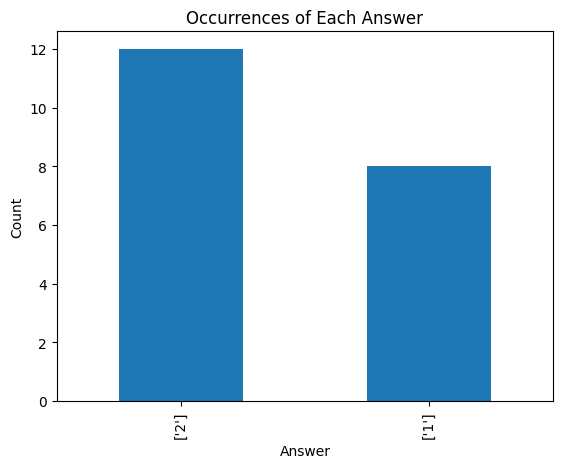

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/rgarzon/Documents/Stanford/genagents/populations/repeat_20_times/answers.csv')

# Count the occurrences of each value in the 'answer' column
value_counts = df['choice'].value_counts()

# Plot the occurrences
value_counts.plot(kind='bar')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Occurrences of Each Answer')
plt.show()

In [16]:
import numpy as np

# Translate log probabilities to probabilities
df['probabilities'] = np.exp(df['logprobs'])

# Print the updated dataframe
print(df[['choice', 'logprobs', 'probabilities']])

   choice  logprobs  probabilities
0   ['2'] -0.000067       0.999933
1   ['2'] -0.000038       0.999962
2   ['1'] -0.029790       0.970649
3   ['1'] -0.043037       0.957876
4   ['1'] -0.001331       0.998670
5   ['2'] -0.002961       0.997043
6   ['2'] -0.000411       0.999589
7   ['2'] -0.003030       0.996974
8   ['1'] -0.000629       0.999371
9   ['2'] -0.005780       0.994237
10  ['1'] -0.071189       0.931286
11  ['2'] -0.004884       0.995128
12  ['2'] -1.746518       0.174380
13  ['1'] -0.043041       0.957873
14  ['2'] -0.017685       0.982470
15  ['2'] -0.001415       0.998586
16  ['1'] -0.003179       0.996826
17  ['1'] -0.001933       0.998069
18  ['2'] -0.000182       0.999818
19  ['2'] -0.000541       0.999459


In [17]:
# Group by 'choice' and sum the probabilities
choice_prob_sum = df.groupby('choice')['probabilities'].sum()

# Find the choice with the highest sum of probabilities
majority_choice = choice_prob_sum.idxmax()

print(f"The majority value of choice based on the sum of total probabilities is: {majority_choice}")

The majority value of choice based on the sum of total probabilities is: ['2']


In [18]:
# Group by 'choice' and calculate statistics for the 'logprobs' column
choice_stats = df.groupby('choice')['probabilities'].describe()

# Print the statistics
print(choice_stats)

        count      mean       std       min       25%       50%       75%  \
choice                                                                      
['1']     8.0  0.976327  0.025816  0.931286  0.957875  0.983738  0.998219   
['2']    12.0  0.928132  0.237420  0.174380  0.994905  0.997815  0.999646   

             max  
choice            
['1']   0.999371  
['2']   0.999962  


choice
['1']    [-0.029790064, -0.04303687, -0.00133131, -0.00...
['2']    [-6.742448e-05, -3.7623562e-05, -0.0029613003,...
Name: logprobs, dtype: object


/var/folders/wr/01kw4xb10mb74c12z_zfm0cw0000gq/T/ipykernel_2035/2147272384.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=grouped.index)


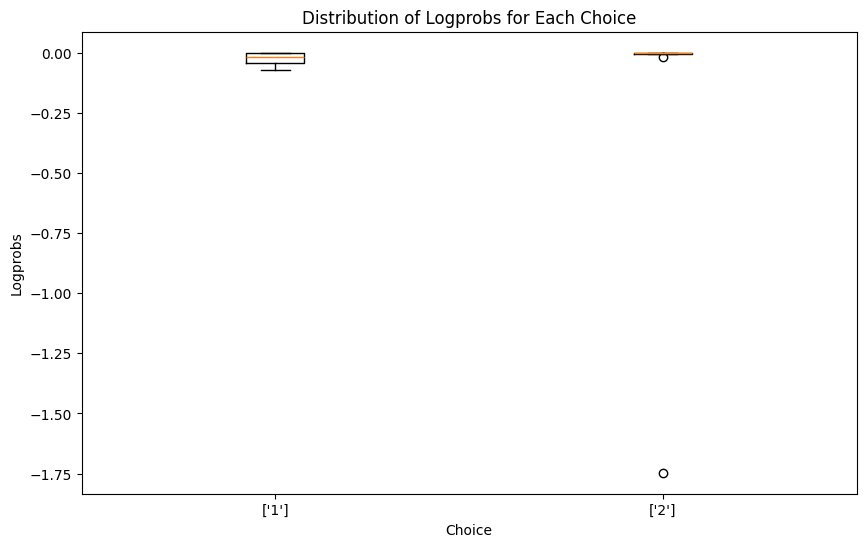

In [3]:
# Load the CSV file with only the required columns
df = pd.read_csv('/Users/rgarzon/Documents/Stanford/genagents/populations/repeat_20_times/answers.csv', usecols=['choice', 'logprobs'])

# Group by 'choice' and get the corresponding 'logprobs'
grouped = df.groupby('choice')['logprobs'].apply(list)

print(grouped)
# Group the data by 'choice' and get the corresponding 'logprobs'
grouped = df.groupby('choice')['logprobs'].apply(list)

# Create a boxplot to visualize the distribution of 'logprobs' for each 'choice'
plt.figure(figsize=(10, 6))
plt.boxplot(grouped, labels=grouped.index)
plt.xlabel('Choice')
plt.ylabel('Logprobs')
plt.title('Distribution of Logprobs for Each Choice')
plt.show()

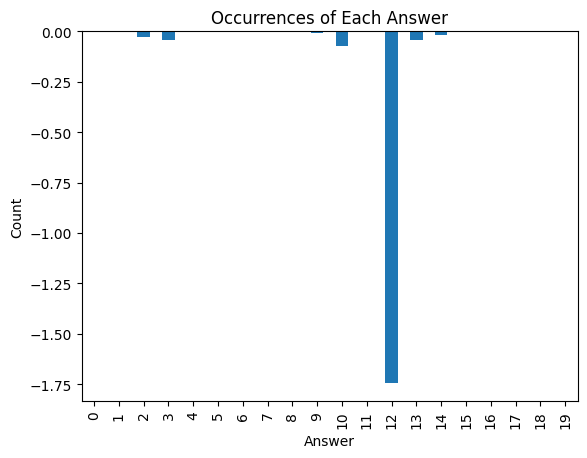

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/rgarzon/Documents/Stanford/genagents/populations/repeat_20_times/answers.csv')

# Count the occurrences of each value in the 'answer' column
value_counts = df['logprobs']

# Plot the occurrences
value_counts.plot(kind='bar')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.title('Occurrences of Each Answer')
plt.show()